In [1]:
library(plyr)
library(ggplot2)
load('summary2.Rdata')

In [2]:
theme_settings = theme_bw() + 
  theme(panel.grid = element_blank(), 
        text=element_text(size=15), 
        plot.title = element_text(hjust = 0.5),
        legend.background=element_blank(),
        legend.key=element_blank(), 
        legend.key.height=unit(1, 'cm'),
        strip.background = element_blank(),
        legend.position = 'bottom')

In [3]:
N = 200
baseline = sqrt(qchisq(p = 0.95, df = N) / N)

In [11]:
Stein_vol[Stein_vol$s == 10 & Stein_vol$design == "equal cor.", ]

,b,s,lam1Type,method,design,r,coverage,c
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
10,0.1,10,1se,twoStepSteinVolume,equal cor.,0.4088634,0.99,vol
13,0.1,10,cv,twoStepSteinVolume,equal cor.,0.4051893,0.98,vol
16,0.1,10,val,twoStepSteinVolume,equal cor.,0.4172334,0.99,vol
28,0.3,10,1se,twoStepSteinVolume,equal cor.,0.4579328,0.94,vol
31,0.3,10,cv,twoStepSteinVolume,equal cor.,0.4450436,0.93,vol
34,0.3,10,val,twoStepSteinVolume,equal cor.,0.4732517,0.92,vol
46,0.5,10,1se,twoStepSteinVolume,equal cor.,0.5183883,0.93,vol
49,0.5,10,cv,twoStepSteinVolume,equal cor.,0.4988874,0.95,vol
52,0.5,10,val,twoStepSteinVolume,equal cor.,0.5336392,0.92,vol


In [4]:
adaptive = ddply(summary_adaptive_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
oracle = ddply(summary_oracle_single_version2, .(b, s, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
Stein_vol = ddply(summary_volume_stein_single, .(b, s, lam1Type, method, design), summarise, 
                         r = mean(exp(logVol / N)), coverage = mean(coverage))
Stein_radius = ddply(summary_radius_stein_single, .(b, s, lam1Type, method, design), summarise, 
                            r = mean(exp(logVol / N)), coverage = mean(coverage))
Lasso_vol = ddply(summary_volume_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))
Lasso_radius = ddply(summary_radius_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))

dataset1 = rbind(adaptive, oracle, Stein_vol)
dataset1$method[dataset1$method == 'twoStepSteinVolume'] = 'two-step stein'
dataset1$method = factor(dataset1$method, levels = c('adaptive', 'oracle', 'two-step stein'))
dataset1$design = factor(dataset1$design, levels = c('toeplitz','exp. decay', 'equal cor.'))
dataset1$lam1Type = factor(dataset1$lam1Type, levels = c('val', 'cv', '1se'))

Stein_vol['c'] = 'vol'
Stein_radius['c'] = 'radius'
Lasso_vol['c'] = 'vol'
Lasso_radius['c'] = 'radius'
dataset2 = rbind(Stein_vol, Stein_radius, Lasso_vol, Lasso_radius)

dataset2$method[dataset2$method == 'twoStepSteinVolume'] = 'two-step stein (volume)'
dataset2$method[dataset2$method == 'twoStepSteinRadius'] = 'two-step stein (diameter)'
dataset2$method[dataset2$method == 'twoStepLassoVolume'] = 'two-step lasso (volume)'
dataset2$method[dataset2$method == 'twoStepLassoRadius'] = 'two-step lasso (diameter)'
dataset2$method = factor(dataset2$method, levels = c('two-step stein (volume)', 'two-step stein (diameter)', 
                                                     'two-step lasso (volume)', 'two-step lasso (diameter)'))
dataset2$design = factor(dataset2$design, levels = c('toeplitz','exp. decay', 'equal cor.'))
dataset2$lam1Type = factor(dataset2$lam1Type, levels = c('val', 'cv', '1se'))

In [5]:
adaptive_m = ddply(summary_adaptive_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
oracle_m = ddply(summary_oracle_multiple_version2, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
Stein_vol_m = ddply(summary_volume_stein_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))
Stein_radius_m = ddply(summary_radius_stein_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))
Lasso_vol_m = ddply(summary_volume_lasso_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))
Lasso_radius_m = ddply(summary_radius_lasso_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))

dataset3 = rbind(adaptive_m, oracle_m, Stein_vol_m)
dataset3$method[dataset3$method == 'twoStepSteinVolume'] = 'two-step stein'
dataset3$method = factor(dataset3$method, levels = c('adaptive', 'oracle', 'two-step stein'))
dataset3$design = factor(dataset3$design, levels = c('toeplitz','exp. decay', 'equal cor.'))
dataset3$lam1Type = factor(dataset3$lam1Type, levels = c('val', 'cv', '1se'))

Stein_vol_m['c'] = 'vol'
Stein_radius_m['c'] = 'radius'
Lasso_vol_m['c'] = 'vol'
Lasso_radius_m['c'] = 'radius'

dataset4 = rbind(Stein_vol_m, Stein_radius_m, Lasso_vol_m, Lasso_radius_m)
dataset4$method[dataset4$method == 'twoStepSteinVolume'] = 'two-step stein (volume)'
dataset4$method[dataset4$method == 'twoStepSteinRadius'] = 'two-step stein (diameter)'
dataset4$method[dataset4$method == 'twoStepLassoVolume'] = 'two-step lasso (volume)'
dataset4$method[dataset4$method == 'twoStepLassoRadius'] = 'two-step lasso (diameter)'
dataset4$method = factor(dataset4$method, levels = c('two-step stein (volume)', 'two-step stein (diameter)', 
                                                     'two-step lasso (volume)', 'two-step lasso (diameter)'))
dataset4$design = factor(dataset4$design, levels = c('toeplitz','exp. decay', 'equal cor.'))
dataset4$lam1Type = factor(dataset4$lam1Type, levels = c('val', 'cv', '1se'))

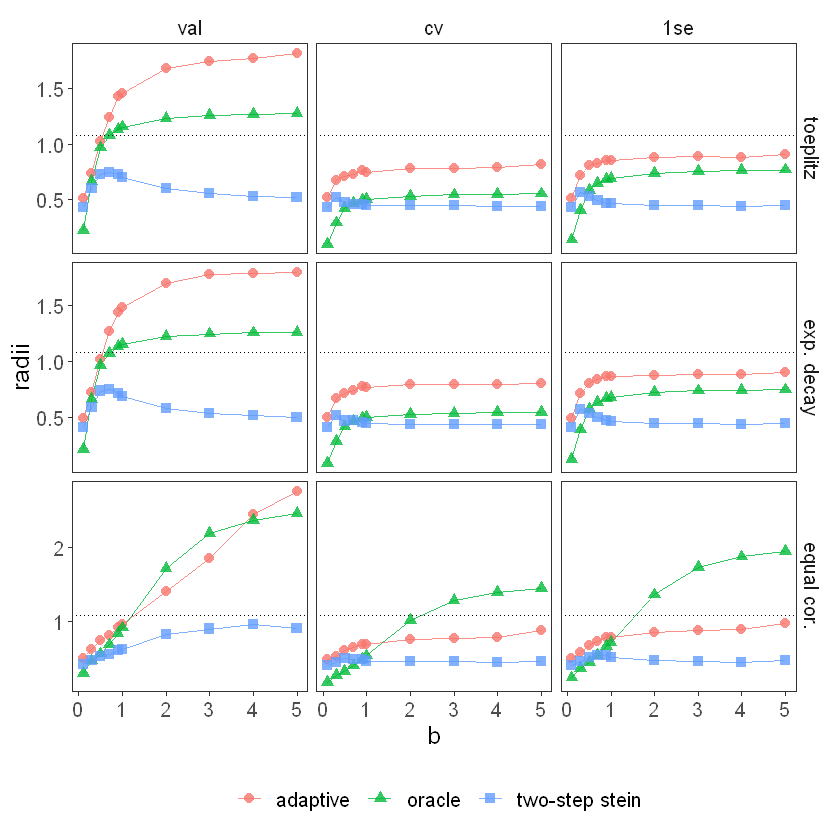

In [6]:
ggplot(data = dataset1[dataset1$s == 10, ], aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 2.5, alpha = 0.8) +
  geom_hline(yintercept = baseline, linetype = 3) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ylab('radii') + 
  theme_settings

ggsave('stein_r.pdf', width = 6.67, height = 6.67, units = 'in')

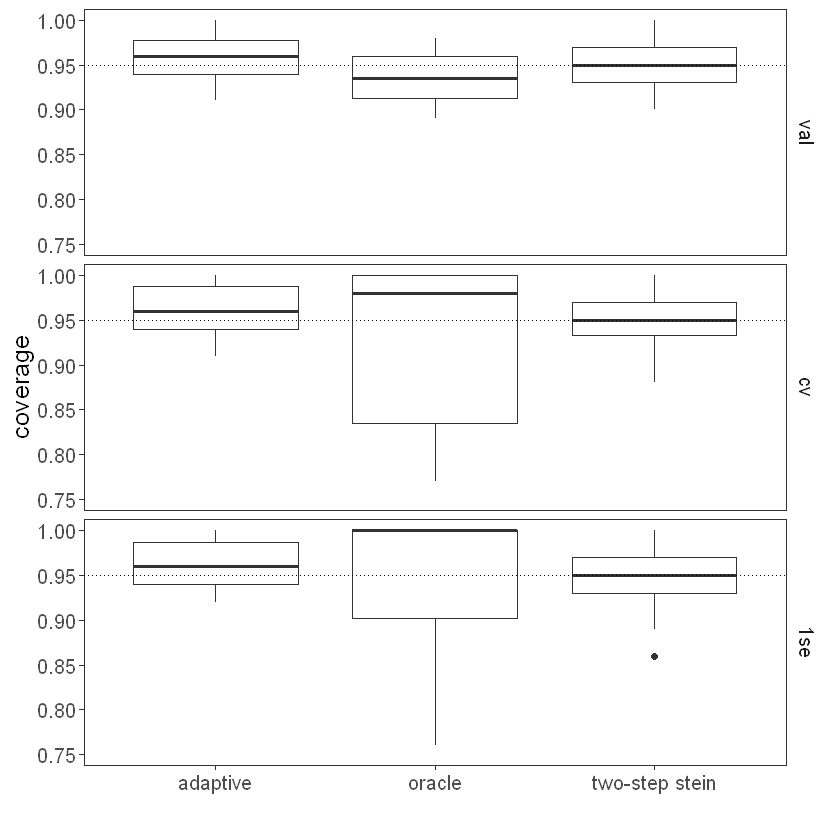

In [7]:
ggplot(data = dataset1[dataset1$s == 10, ], aes(x = method, y = coverage)) + 
  geom_boxplot() + 
  xlab('') + 
  theme_settings +
  coord_cartesian(ylim = c(0.75, 1)) +
  facet_grid(lam1Type~.) + 
  geom_hline(yintercept = 0.95, linetype = 3)

ggsave('coverage1_new.pdf', width = 6.67, height = 6.67, units = 'in')

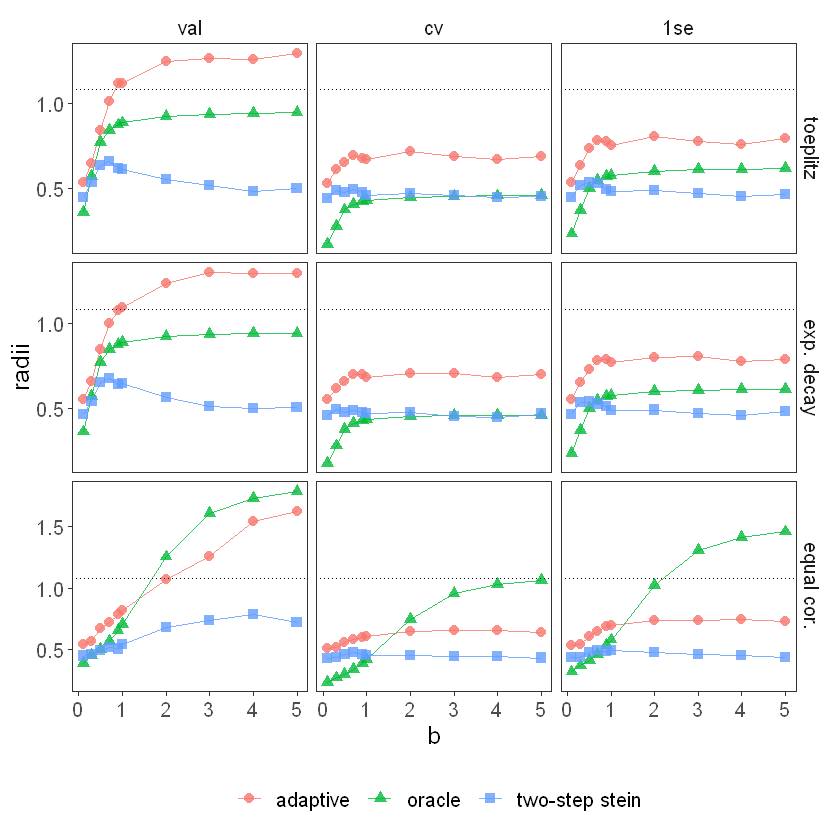

In [8]:
bw = 0.2
ggplot(data = dataset3[dataset3$bw == bw, ], aes(x = bs, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 2.5, alpha = 0.8) +
  geom_hline(yintercept = baseline, linetype = 3) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ylab("radii") +
  xlab('b') + 
  theme_settings

ggsave('stein_r2.pdf', width = 6.67, height = 6.67, units = 'in')

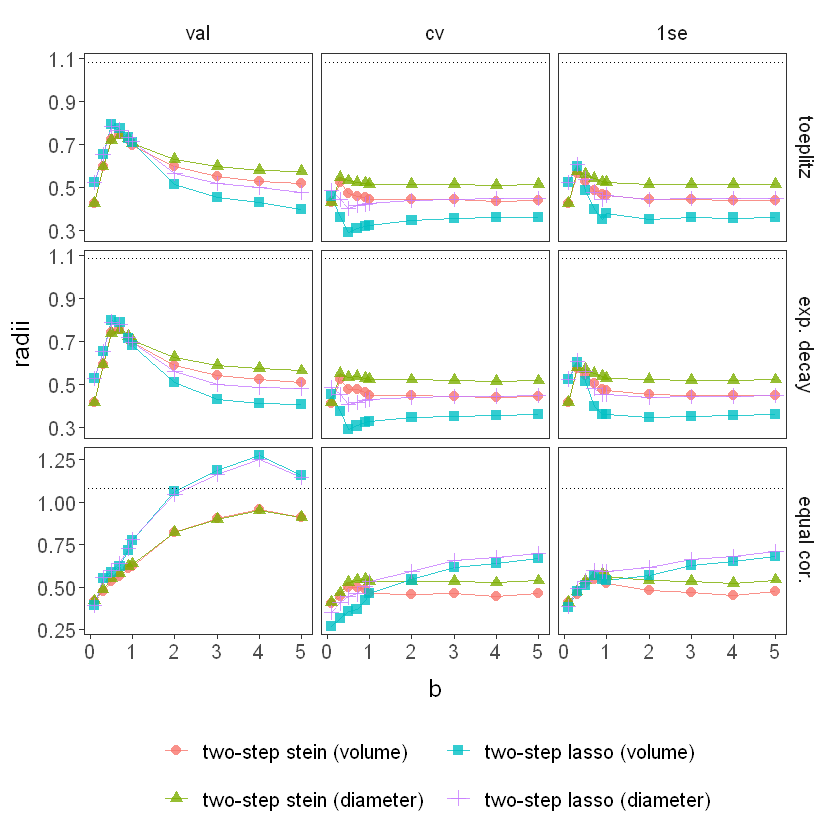

In [9]:
ggplot(data = dataset2[dataset2$s == 10, ], aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 2.5, alpha = 0.8) +
  geom_hline(yintercept = baseline, linetype = 3) +
  scale_color_discrete(name = element_blank(), guide = guide_legend(nrow = 2)) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  theme_settings +
  ylab('radii')
ggsave('lasso_r.pdf', width = 6.67, height = 6.67, units = 'in')

In [10]:
dataset2$method = revalue(dataset2$method, c("two-step stein (volume)"="two-step\nstein (volume)", 
                                             "two-step stein (diameter)"="two-step\nstein (diameter)",
                                             "two-step lasso (volume)"="two-step\nlasso (volume)",
                                             "two-step lasso (diameter)"="two-step\nlasso (diameter)"))

## the case of non sparsity

In [4]:
load('summary_non_sparse.Rdata')
N = 200
baseline = sqrt(qchisq(p = 0.95, df = N) / N)

In [5]:
adaptive = ddply(summary_adaptive_single[summary_adaptive_single$lam1Type == '1se',], 
                 .(b, s, lam1Type, method, design), summarise, 
                 r = mean(r), coverage = mean(coverage))
oracle = ddply(summary_oracle_single_version2[summary_oracle_single_version2$lam1Type == '1se',], 
                                              .(b, s, lam1Type, method, design), summarise, 
                                              r = mean(r), coverage = mean(coverage))
Stein_vol = ddply(summary_volume_stein_single, .(b, s, lam1Type, method, design), summarise, 
                         r = mean(exp(logVol / N)), coverage = mean(coverage))
Stein_radius = ddply(summary_radius_stein_single, .(b, s, lam1Type, method, design), summarise, 
                            r = mean(exp(logVol / N)), coverage = mean(coverage))
Lasso_vol = ddply(summary_volume_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))
Lasso_radius = ddply(summary_radius_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))

dataset5 = rbind(adaptive, oracle, Stein_vol)
dataset5$method[dataset5$method == 'twoStepSteinVolume'] = 'two-step stein'
dataset5$method = factor(dataset5$method, levels = c('adaptive', 'oracle', 'two-step stein'))
dataset5$design = factor(dataset5$design, levels = c('toeplitz','exp. decay', 'equal cor.'))
dataset5$lam1Type = factor(dataset5$lam1Type, levels = c('val', 'cv', '1se'))

Stein_vol['c'] = 'vol'
Stein_radius['c'] = 'radius'
Lasso_vol['c'] = 'vol'
Lasso_radius['c'] = 'radius'
dataset6 = rbind(Stein_vol, Stein_radius, Lasso_vol, Lasso_radius)
dataset6$method[dataset6$method == 'twoStepSteinVolume'] = 'two-step stein (volume)'
dataset6$method[dataset6$method == 'twoStepSteinRadius'] = 'two-step stein (diameter)'
dataset6$method[dataset6$method == 'twoStepLassoVolume'] = 'two-step lasso (volume)'
dataset6$method[dataset6$method == 'twoStepLassoRadius'] = 'two-step lasso (diameter)'
dataset6$method = factor(dataset6$method, levels = c('two-step stein (volume)', 'two-step stein (diameter)', 
                                                     'two-step lasso (volume)', 'two-step lasso (diameter)'))
dataset6$design = factor(dataset6$design, levels = c('toeplitz','exp. decay', 'equal cor.'))
dataset6$lam1Type = factor(dataset6$lam1Type, levels = c('val', 'cv', '1se'))

In [6]:
adaptive_m = ddply(summary_adaptive_multiple[summary_adaptive_multiple$lam1Type == '1se',]
                   , .(bs, bw, lam1Type, method, design), summarise,
                   r = mean(r), coverage = mean(coverage))
oracle_m = ddply(summary_oracle_multiple_version2[summary_oracle_multiple_version2$lam1Type == '1se',], 
                 .(bs, bw, lam1Type, method, design), summarise, 
                 r = mean(r), coverage = mean(coverage))
Stein_vol_m = ddply(summary_volume_stein_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))
Stein_radius_m = ddply(summary_radius_stein_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))
Lasso_vol_m = ddply(summary_volume_lasso_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))
Lasso_radius_m = ddply(summary_radius_lasso_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))

dataset7 = rbind(adaptive_m, oracle_m, Stein_vol_m)
dataset7$method[dataset7$method == 'twoStepSteinVolume'] = 'two-step stein'
dataset7$method = factor(dataset7$method, levels = c('adaptive', 'oracle', 'two-step stein'))
dataset7$design = factor(dataset7$design, levels = c('toeplitz','exp. decay', 'equal cor.'))
dataset7$lam1Type = factor(dataset7$lam1Type, levels = c('val', 'cv', '1se'))

Stein_vol_m['c'] = 'vol'
Stein_radius_m['c'] = 'radius'
Lasso_vol_m['c'] = 'vol'
Lasso_radius_m['c'] = 'radius'

dataset8 = rbind(Stein_vol_m, Stein_radius_m, Lasso_vol_m, Lasso_radius_m)
dataset8$method[dataset8$method == 'twoStepSteinVolume'] = 'two-step stein (volume)'
dataset8$method[dataset8$method == 'twoStepSteinRadius'] = 'two-step stein (diameter)'
dataset8$method[dataset8$method == 'twoStepLassoVolume'] = 'two-step lasso (volume)'
dataset8$method[dataset8$method == 'twoStepLassoRadius'] = 'two-step lasso (diameter)'
dataset8$method = factor(dataset8$method, levels = c('two-step stein (volume)', 'two-step stein (diameter)', 
                                                     'two-step lasso (volume)', 'two-step lasso (diameter)'))
dataset8$design = factor(dataset8$design, levels = c('toeplitz','exp. decay', 'equal cor.'))
dataset8$lam1Type = factor(dataset8$lam1Type, levels = c('val', 'cv', '1se'))

# process data and combine single and multiple into one

In [7]:
temp1 = dataset5[,c('b', 'method', 'r', 'coverage')]
temp1['type'] = 'single'


temp2 = dataset7[,c('bs', 'method', 'r', 'coverage')]
colnames(temp2) = c('b', 'method', 'r', 'coverage')
temp2['type'] = 'double'

temp = rbind(temp1, temp2)
temp$type = factor(temp$type)

In [8]:
theme2 = theme_bw() + 
  theme(panel.grid = element_blank(), 
        text=element_text(size=14), 
        plot.title = element_text(hjust = 0.5),
        legend.background=element_blank(),
        legend.key=element_blank(), 
        legend.key.height=unit(1, 'cm'),
        strip.background = element_blank(),
        legend.position = 'bottom',
        strip.placement = "outside")

In [9]:
levels(temp$type) = c('(a) First way to generate coefficients', '(b) Second way to generate coefficients')
fig_r = ggplot(data = temp, aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 2.5, alpha = 0.8) +
  geom_hline(yintercept = baseline, linetype = 3) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_wrap(. ~ type, scales="free_y") +
  ylab("radii") +
  xlab('b') + 
  theme2

In [10]:
levels(temp$type) = c('(c) First way to generate coefficients', '(d) Second way to generate coefficients')
fig_cov = ggplot(data = temp, aes(x = method, y = coverage)) + 
  geom_boxplot() + 
  xlab('') + 
  geom_hline(yintercept = 0.95, linetype = 3) +
  facet_wrap(. ~ type, scales="free_y", nrow=1) +
  coord_cartesian(ylim = c(0.75, 1)) +
  theme2

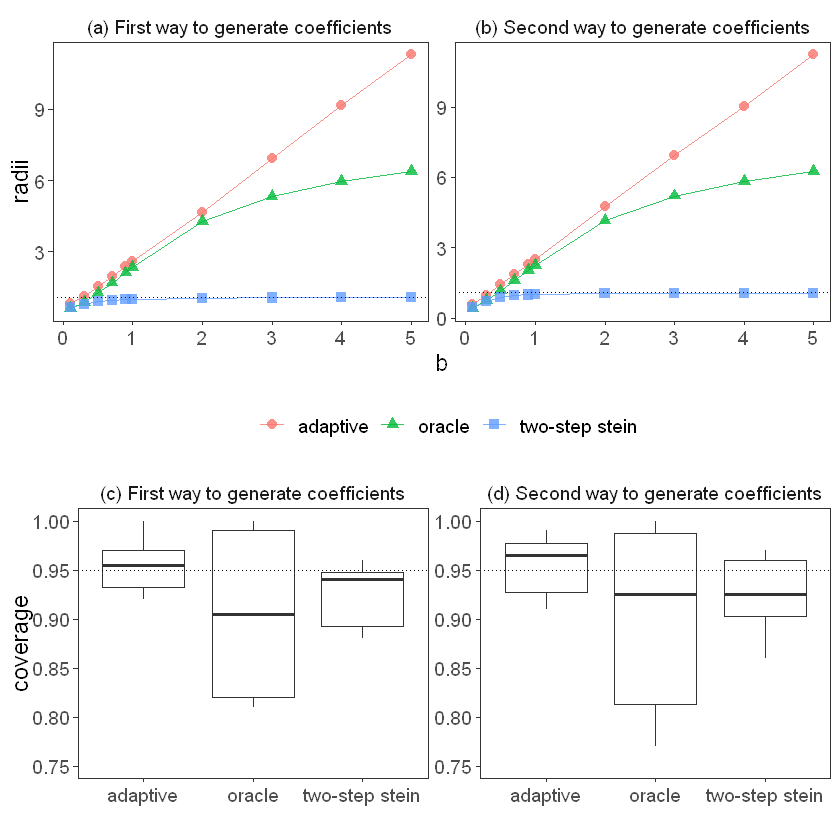

In [11]:
library(gridBase)
library(gridExtra)
fig_final = grid.arrange(fig_r, fig_cov, nrow = 2, heights = c(5, 4))
ggsave('dense.pdf', fig_final, width = 6.67, height = 7.2, units = 'in')

In [20]:
temp = ddply(summary_volume_stein_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage), k = mean(k))

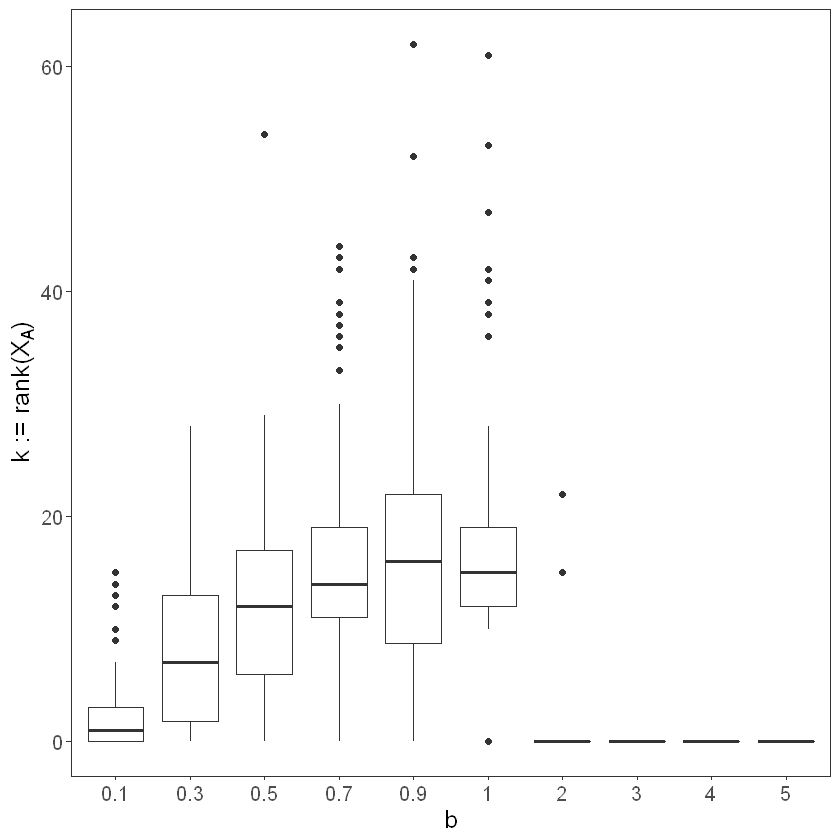

In [21]:
ggplot(data = summary_volume_stein_single[summary_volume_stein_single$s == 100,]) + 
geom_boxplot(aes(x = factor(b), y = k)) +
xlab('b') + ylab(expression('k := rank(' * 'X'[A] * ')')) +
theme_settings +
ggsave('k_b.pdf', width = 6.67, height = 2.3, units = 'in')

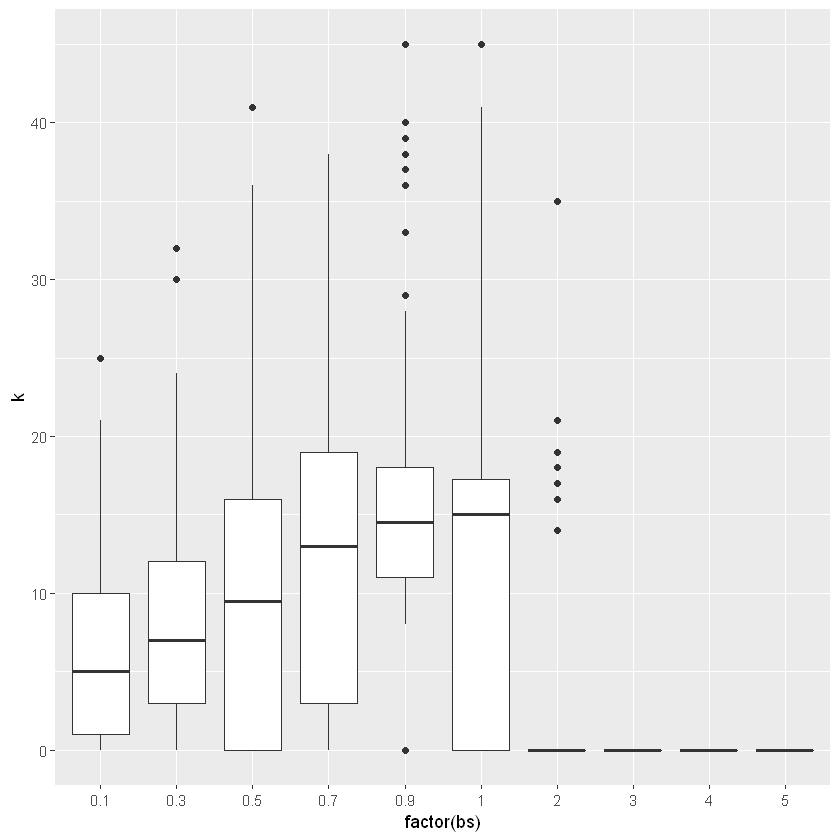

In [22]:
ggplot(data = summary_volume_stein_multiple[summary_volume_stein_multiple$bw == 0.2,]) + 
geom_boxplot(aes(x = factor(bs), y = k))


In [23]:
ddply(summary_volume_stein_single, .(b), summarise, count = sum(coverage == F))


b,count
0.1,10
0.3,9
0.5,4
0.7,7
0.9,3
1.0,3
2.0,4
3.0,11
4.0,8
5.0,14
